Import libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

Import data

In [14]:
df = pd.read_csv("../backend/dataset1.csv")
df.drop(columns=["rawData"], inplace = True)
df.head()

,pos,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,0,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,0,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,1,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,1,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Split data into output and input

In [15]:
target_column = "pos"
output_column = df.drop(columns=[target_column])
output_rows = df[target_column]
df.drop(target_column, axis=1, inplace=True)
df.head()

,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Scale data

In [16]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)

Split train and test data (investigate whether to stratify data later on)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=1, stratify=output_rows)

Model

In [18]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(6,)))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

/home/tsw/projects/strAIght/classifier/.venvc/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training

In [19]:
basic_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7723 - loss: 0.6353
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7515 - loss: 0.6330
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7738 - loss: 0.6233
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8080 - loss: 0.6240 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8080 - loss: 0.6191
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8080 - loss: 0.6097 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8497 - loss: 0.5929
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8185 - loss: 0.5961
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8185 - loss: 0.5931
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8185 - loss: 0.5847
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8185 - loss: 0.5815 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8185 - loss: 0.

Results

In [20]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9474 - loss: 0.2152
[0.2152409553527832, 0.9473684430122375]
Loss =  0.2152409553527832
Accuracy =  0.9473684430122375


Graphs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


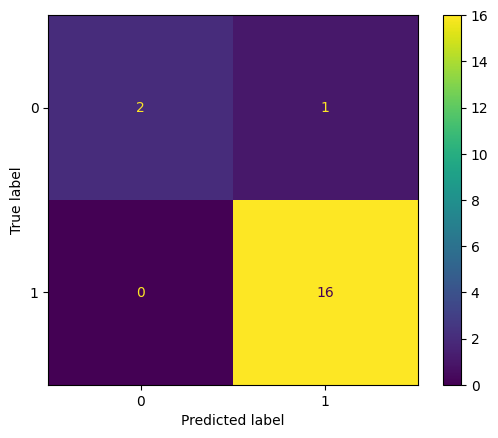

In [21]:
predicted = basic_model.predict(X_test)

predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

Save model

In [28]:
from datetime import datetime
now = datetime.now()

print(now)

formatted_string = now.strftime("%Y-%m-%d(%H:%M:%S)")

basic_model.save("./models/" + formatted_string + ".keras")

2024-11-23 21:57:35.491323
